In [28]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# load the model

In [29]:
model = load_model(r"C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S3_training\resnet_trained_model.keras")

# Load the dataset

In [30]:
X_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_train.npy')
y_train = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_train.npy')
X_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_val.npy')
y_val = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_val.npy')
X_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\X_test.npy')
y_test = np.load(r'C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S1_preprocessing\y_test.npy')

# Evaluate the model on the validation and test sets

In [31]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [32]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Validation Loss: 4.38322639465332
Validation Accuracy: 0.345001220703125
Test Loss: 3.0512454509735107
Test Accuracy: 0.5908203125


# Make predictions on the test set

In [33]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step


# Choose a random sample from the test set

In [34]:
idx = np.random.randint(0, len(X_test))
test_image = X_test[idx]
test_mask = y_test[idx]

In [35]:
predicted_mask = model.predict(np.expand_dims(test_image, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


# Predict the mask for the test image

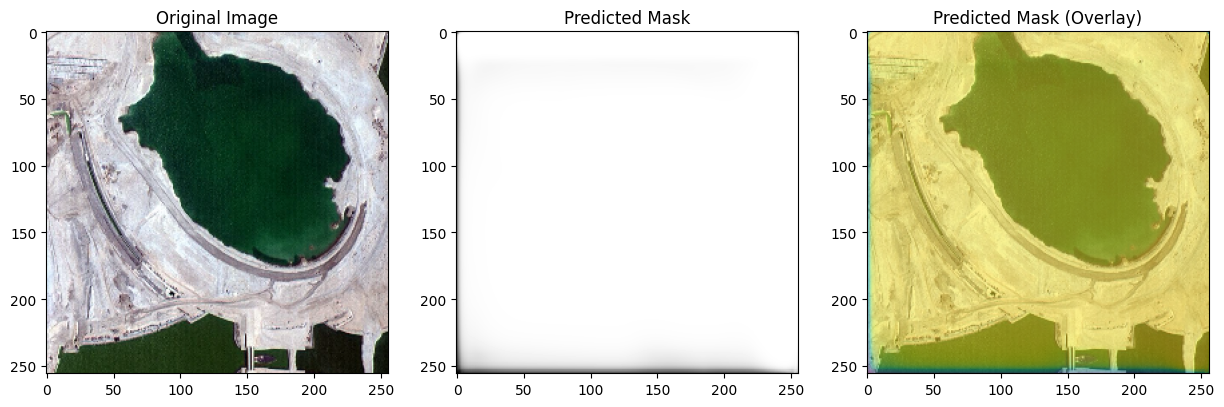

In [36]:
# Convert predicted mask to grayscale
predicted_mask_gray = np.max(predicted_mask, axis=-1)

# Plot the original test image and the predicted mask
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(predicted_mask_gray, cmap='gray')  # Plot grayscale mask
plt.title("Predicted Mask")

plt.subplot(1, 3, 3)
plt.imshow(test_image)
plt.imshow(predicted_mask_gray, alpha=0.5, cmap='viridis')  # Overlay mask on image
plt.title("Predicted Mask (Overlay)")

plt.show()
